## Data Preprocessing

In [1]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('electricity-normalized.arff')
df = pd.DataFrame(data[0])
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,b'2',0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,b'UP'
1,0.0,b'2',0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,b'UP'
2,0.0,b'2',0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,b'UP'
3,0.0,b'2',0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,b'UP'
4,0.0,b'2',0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,b'DOWN'


In [2]:
from numpy.random import randint #load  necessary packages
import pandas as pd #needed for Data Frames
import numpy as np #Needed for computations
NIA = 52005602
np.random.seed(NIA)

In [ ]:
df.describe()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.499080,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526
std,0.340308,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912
50%,0.456329,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912
75%,0.880547,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  object 
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class      45312 non-null  object 
dtypes: float64(7), object(2)
memory usage: 3.1+ MB


In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
print(missing_data)

           Total  Percent
date           0      0.0
day            0      0.0
period         0      0.0
nswprice       0      0.0
nswdemand      0      0.0
vicprice       0      0.0
vicdemand      0      0.0
transfer       0      0.0
class          0      0.0


In [ ]:
def remove_constant_value_features(df):
    return [e for e in df.columns if df[e].nunique() == 1]

remove_constant_value_features(df)

[]

day      7
class    2
dtype: int64

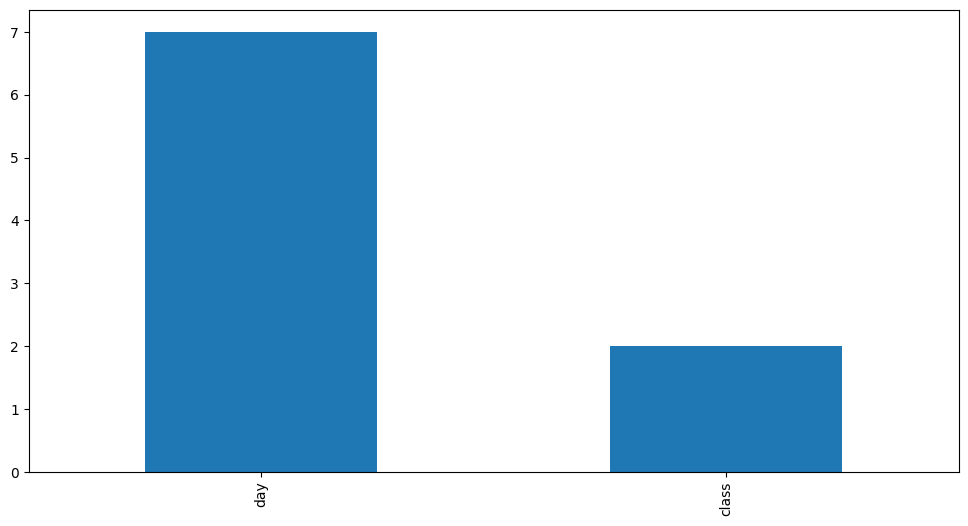

In [ ]:
availo=df.select_dtypes(include='object')
availo.nunique().plot.bar(figsize=(12,6))
availo.nunique()

In [3]:
df['day']=df['day'].astype(int)

In [ ]:
print(pd.value_counts(df['class'], sort = True))

b'DOWN'    26075
b'UP'      19237
Name: class, dtype: int64


No missing values. Not very unbalanced. Clean data set. Lets define the proprocessor pipelines.

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

numeric_features=['date','period','nswprice','nswdemand','vicprice','vicdemand','transfer','day']

numeric_transformer1=Pipeline(steps=[('scaler1',MinMaxScaler())])
preprocessor1=ColumnTransformer(transformers=[('num',numeric_transformer1,numeric_features)])


In [5]:
xtrain = df.drop(['class'],axis=1)
ytrain = df.loc[:,'class']

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
ytrain = label_encoder.fit_transform(ytrain)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(xtrain,ytrain, test_size=0.33, random_state=33,stratify=ytrain)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(30359, 8) (30359,)
(14953, 8) (14953,)


## Default Parameters

The following four algorithms will follow the next scheme. Compute the accuracy with default parameters. the selected metric is balanced_accuracy because the data set is unbalanced and offers better results than F1.

### Extremely Randomized Trees

In [8]:
import time
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
def default_hp(classif, X_train, y_train, X_test, y_test):
  inicio = time.time()
  np.random.seed(NIA)
  classif.fit(X_train, y_train)
  y_hat=classif.predict(X_test)
  bac = metrics.balanced_accuracy_score(y_test, y_hat)
  print(f"Accuracy: {bac}")
  fin=time.time()
  print('time',fin-inicio)
  return((bac , fin-inicio))

In [ ]:
rs=NIA
clf = ExtraTreesClassifier(random_state=rs)
classif=Pipeline([('clf',clf)])
(bac1, tiempo1)=default_hp(classif, X_train, y_train, X_test, y_test)

Accuracy: 0.8847471942097819
time 7.09550929069519


### Support Vector Machines

In [ ]:
from sklearn import svm
rs=NIA
svmc = svm.SVC(random_state=rs)
classif=Pipeline([('preprocessor',preprocessor1),('svmc',svmc)])
(bac2, tiempo2)=default_hp(classif, X_train, y_train, X_test, y_test)

Accuracy: 0.770129789651318
time 55.39457368850708


We will use balanced accuracy metric because offers better results. Use both of them all the time increase the computational cost.

### Hist Grading Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
rs=NIA
hgb = HistGradientBoostingClassifier(random_state=rs)
classif=Pipeline([('hgb',hgb)])
(bac3, tiempo3)=default_hp(classif, X_train, y_train, X_test, y_test)


Accuracy: 0.8759628822503585
time 2.2594714164733887


### XGBoost (XGB Classifier)

In [9]:
!pip install xgboost
import xgboost as xgb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
rs=NIA
xgbc = xgb.XGBClassifier(random_state=rs)
classif=Pipeline([('xgb',xgbc)])
(bac4, tiempo4)=default_hp(classif, X_train, y_train, X_test, y_test)

Accuracy: 0.911532454094808
time 2.9138503074645996


## Hyper-Parameter tunning

### Extremely Randomized Trees

In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
import optuna
import time
from sklearn.ensemble import ExtraTreesClassifier
from optuna import trial
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
inicio = time.time()
rs=NIA
cv_inner = StratifiedKFold(n_splits=3, random_state=rs, shuffle=True)
np.random.seed(NIA)
def objective(trial):
    rf__max_features = trial.suggest_float("rf__max_features", 0.1,1)
    rf__max_depth = trial.suggest_int("rf__max_depth", 6, 40)
    rf__min_samples_leaf=trial.suggest_int("rf__min_samples_leaf", 1, 60)
    classifier_obj = Pipeline([('Ext',ExtraTreesClassifier(
        max_depth=rf__max_depth, max_features=rf__max_features, min_samples_leaf=rf__min_samples_leaf,random_state=rs
    ))])


    # Step 3: Scoring method:
    score = cross_val_score(classifier_obj, X_train, y_train,scoring='balanced_accuracy', n_jobs=-1, cv = cv_inner)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

fin=time.time()
print('time',fin-inicio)
tiempoopt1=fin-inicio


[I 2023-05-11 18:29:00,470] A new study created in memory with name: no-name-2eef8612-fcc4-4e2b-8673-8137133f9aaf
[I 2023-05-11 18:29:13,608] Trial 0 finished with value: 0.7944825367625558 and parameters: {'rf__max_features': 0.44884219868589736, 'rf__max_depth': 17, 'rf__min_samples_leaf': 28}. Best is trial 0 with value: 0.7944825367625558.
[I 2023-05-11 18:29:15,894] Trial 1 finished with value: 0.6082518809102432 and parameters: {'rf__max_features': 0.19728557225657956, 'rf__max_depth': 9, 'rf__min_samples_leaf': 11}. Best is trial 0 with value: 0.7944825367625558.
[I 2023-05-11 18:29:21,234] Trial 2 finished with value: 0.7790874801149893 and parameters: {'rf__max_features': 0.28854402710024873, 'rf__max_depth': 21, 'rf__min_samples_leaf': 23}. Best is trial 0 with value: 0.7944825367625558.
[I 2023-05-11 18:29:26,864] Trial 3 finished with value: 0.7876919298590997 and parameters: {'rf__max_features': 0.39228469945725886, 'rf__max_depth': 25, 'rf__min_samples_leaf': 39}. Best is

time 189.9166214466095


In [ ]:
# Getting the best trial:
print(f"The best trial is : \n{study.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study.best_value}")


# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")


The best trial is : 
FrozenTrial(number=12, state=TrialState.COMPLETE, values=[0.8833924149043355], datetime_start=datetime.datetime(2023, 5, 11, 18, 30, 9, 998707), datetime_complete=datetime.datetime(2023, 5, 11, 18, 30, 18, 720519), params={'rf__max_features': 0.9877539163773025, 'rf__max_depth': 32, 'rf__min_samples_leaf': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf__max_features': FloatDistribution(high=1.0, log=False, low=0.1, step=None), 'rf__max_depth': IntDistribution(high=40, log=False, low=6, step=1), 'rf__min_samples_leaf': IntDistribution(high=60, log=False, low=1, step=1)}, trial_id=12, value=None)
The best value is : 
0.8833924149043355
The best parameters are : 
{'rf__max_features': 0.9877539163773025, 'rf__max_depth': 32, 'rf__min_samples_leaf': 1}


In [ ]:
trial = study.best_trial

print('Precision: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Precision: 0.8833924149043355
Best hyperparameters: {'rf__max_features': 0.9877539163773025, 'rf__max_depth': 32, 'rf__min_samples_leaf': 1}


In [ ]:
import matplotlib.pyplot as plt
optuna.visualization.plot_optimization_history(study).show()

In [ ]:
from optuna.visualization import plot_parallel_coordinate
plot_parallel_coordinate(study)

In [ ]:
from optuna.visualization import plot_param_importances
plot_param_importances(study)

In [ ]:
rs=NIA
rf = ExtraTreesClassifier(random_state=rs)
classif=Pipeline([('rf',rf)])
classif.set_params(**study.best_params)
(bacopt1, tiempo)=default_hp(classif, X_train, y_train, X_test, y_test)

Accuracy: 0.8993884616694254
time 6.082575798034668


In [10]:
import time
from scipy.stats import randint as sp_randint
from sklearn import metrics
from scipy.stats import uniform, expon
from sklearn.model_selection import PredefinedSplit, RandomizedSearchCV
from sklearn.model_selection import KFold
def default_RS(classif, X_train, y_train, X_test, y_test,param_grid,n):
  inicio = time.time()
  rs=NIA
  np.random.seed(NIA)
  cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=rs)
  clf_rnd=RandomizedSearchCV(classif,param_grid, scoring='balanced_accuracy', cv=cv , n_jobs=1, verbose=1, random_state=rs,n_iter=n)
  clf_rnd.fit(X_train, y_train)
  y_hat=clf_rnd.predict(X_test)
  print("Accuracy: ",metrics.balanced_accuracy_score(y_test, y_hat))
  print(f"Best hyper-parameters: {clf_rnd.best_params_} and their score (inner evaluation): {clf_rnd.best_score_}")
  fin=time.time()
  print('time',fin-inicio)
  return(metrics.balanced_accuracy_score(y_test, y_hat),clf_rnd.best_params_,clf_rnd.best_score_,fin-inicio)

In [ ]:
import time
rs=NIA
clf = ExtraTreesClassifier(random_state=rs)
classif=Pipeline([('clf',clf)])
param_grid = {'clf__max_depth': sp_randint(6,40), 'clf__min_samples_leaf': sp_randint(6,60),'clf__max_features':uniform(0.1,0.9)}
(Accur1,best_params,inner_score,timer1)=default_RS(classif, X_train, y_train, X_test, y_test,param_grid,200)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Accuracy:  0.8546808540630273
Best hyper-parameters: {'clf__max_depth': 26, 'clf__max_features': 0.9610623694680618, 'clf__min_samples_leaf': 7} and their score (inner evaluation): 0.8435163772856051
time 822.6879241466522


### Support Vector Machines

In [ ]:
import optuna
import time
from sklearn import svm
from optuna import trial
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
inicio = time.time()
rs=NIA
cv_inner = StratifiedKFold(n_splits=3, random_state=rs, shuffle=True)
np.random.seed(NIA)
def objective(trial):
    svc__Gamma = trial.suggest_float('svc__gamma',0.001,1,log=True)
    svc__C = trial.suggest_float("svc__C",0.1,100,log=True)
    classifier_obj = Pipeline([('preprocessor',preprocessor1),('svc',svm.SVC(gamma=svc__Gamma, C=svc__C,random_state=rs))])


    # Step 3: Scoring method:
    score = cross_val_score(classifier_obj, X_train, y_train,scoring='balanced_accuracy', n_jobs=-1, cv=cv_inner)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)
fin=time.time()
print('time',fin-inicio)
timeopt2=fin-inicio

[I 2023-05-11 18:37:07,537] A new study created in memory with name: no-name-b52f5920-c4ad-45a1-b72b-f9d26e323125
[I 2023-05-11 18:38:48,824] Trial 0 finished with value: 0.5785231379212462 and parameters: {'svc__gamma': 0.022814782620797225, 'svc__C': 0.1434081462335421}. Best is trial 0 with value: 0.5785231379212462.
[I 2023-05-11 18:39:57,396] Trial 1 finished with value: 0.7743552367999138 and parameters: {'svc__gamma': 0.31143006509060156, 'svc__C': 91.61060356132802}. Best is trial 1 with value: 0.7743552367999138.
[I 2023-05-11 18:41:11,239] Trial 2 finished with value: 0.7376414355643414 and parameters: {'svc__gamma': 0.1503970706252709, 'svc__C': 1.3272604542259374}. Best is trial 1 with value: 0.7743552367999138.
[I 2023-05-11 18:42:29,341] Trial 3 finished with value: 0.7251602248259171 and parameters: {'svc__gamma': 0.4404977025651611, 'svc__C': 0.2779840592604626}. Best is trial 1 with value: 0.7743552367999138.
[I 2023-05-11 18:43:30,873] Trial 4 finished with value: 0.7

time 2074.6722960472107


In [ ]:
# Getting the best trial:
print(f"The best trial is : \n{study.best_trial}")
# Getting the best score:
print(f"The best value is : \n{study.best_value}")
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
trial = study.best_trial
print('Precision: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
optuna.visualization.plot_optimization_history(study).show()

The best trial is : 
FrozenTrial(number=11, state=TrialState.COMPLETE, values=[0.7881826391401789], datetime_start=datetime.datetime(2023, 5, 11, 18, 50, 50, 492667), datetime_complete=datetime.datetime(2023, 5, 11, 18, 52, 2, 38013), params={'svc__gamma': 0.899061702133208, 'svc__C': 85.04247821943686}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'svc__gamma': FloatDistribution(high=1.0, log=True, low=0.001, step=None), 'svc__C': FloatDistribution(high=100.0, log=True, low=0.1, step=None)}, trial_id=11, value=None)
The best value is : 
0.7881826391401789
The best parameters are : 
{'svc__gamma': 0.899061702133208, 'svc__C': 85.04247821943686}
Precision: 0.7881826391401789
Best hyperparameters: {'svc__gamma': 0.899061702133208, 'svc__C': 85.04247821943686}


In [ ]:
from optuna.visualization import plot_parallel_coordinate
plot_parallel_coordinate(study)

In [ ]:
from optuna.visualization import plot_param_importances
plot_param_importances(study)

In [ ]:
rs=NIA
svc = svm.SVC(random_state=rs)
classif=Pipeline([('preprocessor',preprocessor1),('svc',svc)])
classif.set_params(**study.best_params)
(bacopt2, tiempo)=default_hp(classif, X_train, y_train, X_test, y_test)

Accuracy: 0.7849027287003241
time 59.91516923904419


In [ ]:
import time
from sklearn import metrics
from scipy.stats import loguniform
from sklearn.model_selection import PredefinedSplit, RandomizedSearchCV
from sklearn.model_selection import KFold
rs=NIA
svc = svm.SVC(random_state=rs)
clf=Pipeline([('preprocessor1',preprocessor1),('svc',svc)])
param_grid = {'svc__C': loguniform(0.1,100),
              'svc__gamma': loguniform(0.001,1)}
(Accur2,best_params,inner_score,timer2)=default_RS(clf, X_train, y_train, X_test, y_test,param_grid,30)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Accuracy:  0.7838542530518335
Best hyper-parameters: {'svc__C': 58.4555281556, 'svc__gamma': 0.9555442889814889} and their score (inner evaluation): 0.7873088068761852
time 2426.6965866088867


### Hist Gradient Boosting

In [ ]:
from pickle import TRUE
import optuna
from optuna import trial
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
inicio = time.time()
rs=NIA
np.random.seed(NIA)
def objective(trial):
    hgb__max_depth = trial.suggest_int('hgb__max_depth',3,25)
    hgb__learning_rate = trial.suggest_float("hgb__learning_rate",0.01,0.7)
    classifier_obj = Pipeline([('hgb',HistGradientBoostingClassifier(max_depth=hgb__max_depth, learning_rate=hgb__learning_rate,random_state=rs))])

    # Step 3: Scoring method:
    score = cross_val_score(classifier_obj, X_train, y_train,scoring='balanced_accuracy', n_jobs=-1, cv=cv_inner)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

fin=time.time()
print('time',fin-inicio)
timeopt3=fin-inicio

[I 2023-05-30 22:28:49,908] A new study created in memory with name: no-name-0cccdf41-c6cc-493a-b294-da314e8deed0
[I 2023-05-30 22:28:53,774] Trial 0 finished with value: 0.8951935300804159 and parameters: {'hgb__max_depth': 17, 'hgb__learning_rate': 0.5187892210636453}. Best is trial 0 with value: 0.8951935300804159.
[I 2023-05-30 22:28:54,865] Trial 1 finished with value: 0.8795579141865529 and parameters: {'hgb__max_depth': 25, 'hgb__learning_rate': 0.6857575333145391}. Best is trial 0 with value: 0.8951935300804159.
[I 2023-05-30 22:28:56,504] Trial 2 finished with value: 0.8849030224964615 and parameters: {'hgb__max_depth': 5, 'hgb__learning_rate': 0.5446110534751253}. Best is trial 0 with value: 0.8951935300804159.
[I 2023-05-30 22:28:58,666] Trial 3 finished with value: 0.8511811454306843 and parameters: {'hgb__max_depth': 19, 'hgb__learning_rate': 0.051585588987645266}. Best is trial 0 with value: 0.8951935300804159.
[I 2023-05-30 22:29:00,165] Trial 4 finished with value: 0.86

time 58.76118779182434


In [ ]:
# Getting the best trial:
print(f"The best trial is : \n{study.best_trial}")
# Getting the best score:
print(f"The best value is : \n{study.best_value}")
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
trial = study.best_trial
print('Precision: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
optuna.visualization.plot_optimization_history(study).show()

The best trial is : 
FrozenTrial(number=5, state=TrialState.COMPLETE, values=[0.8969339062413524], datetime_start=datetime.datetime(2023, 5, 30, 22, 29, 0, 168471), datetime_complete=datetime.datetime(2023, 5, 30, 22, 29, 3, 291403), params={'hgb__max_depth': 24, 'hgb__learning_rate': 0.5158942400624256}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'hgb__max_depth': IntDistribution(high=25, log=False, low=3, step=1), 'hgb__learning_rate': FloatDistribution(high=0.7, log=False, low=0.01, step=None)}, trial_id=5, value=None)
The best value is : 
0.8969339062413524
The best parameters are : 
{'hgb__max_depth': 24, 'hgb__learning_rate': 0.5158942400624256}
Precision: 0.8969339062413524
Best hyperparameters: {'hgb__max_depth': 24, 'hgb__learning_rate': 0.5158942400624256}


In [ ]:
plot_parallel_coordinate(study)


In [ ]:
plot_param_importances(study)


In [ ]:
rs=NIA
hgb = HistGradientBoostingClassifier(random_state=rs)
classif=Pipeline([('hgb',hgb)])
classif.set_params(**study.best_params)
(bacopt3, tiempo)=default_hp(classif, X_train, y_train, X_test, y_test)

Accuracy: 0.8923447501800472
time 0.5399169921875


In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import time
rs=NIA
hgb = HistGradientBoostingClassifier(random_state=rs)
clf=Pipeline([('hgb',hgb)])
param_grid = {'hgb__max_depth': sp_randint(3,25),
              'hgb__learning_rate': uniform(0.01,0.7)}
(Accur3,best_params,inner_score,timer3)=default_RS(clf, X_train, y_train, X_test, y_test,param_grid,30)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Accuracy:  0.9088169987335363
Best hyper-parameters: {'hgb__learning_rate': 0.48619872960243593, 'hgb__max_depth': 11} and their score (inner evaluation): 0.8981460926588363
time 77.056969165802


### XGBoost

#### Early stopping

In [ ]:
rs=NIA
X_val1, X_val2, y_val1, y_val2 = train_test_split(X_train,y_train, test_size=0.33, random_state=rs,stratify=y_train)
print(X_val1.shape, y_val1.shape)
print(X_val2.shape, y_val2.shape)

(20340, 8) (20340,)
(10019, 8) (10019,)


In [ ]:
dtrain = xgb.DMatrix(X_val1, label=y_val1)
dval = xgb.DMatrix(X_val2, label=y_val2)

In [ ]:
from pandas.core.common import random_state
import optuna
import time
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
inicio = time.time()
cv_inner = StratifiedKFold(n_splits=3, random_state=rs, shuffle=True)
rs=NIA
np.random.seed(NIA)
def _objective(trial):
    xgbc__max_depth = trial.suggest_int('max_depth',3,30)
    xgbc__learning_rate = trial.suggest_float("learning_rate",0.01,0.5)
    model = xgb.XGBClassifier(max_depth=xgbc__max_depth, learning_rate=xgbc__learning_rate,n_estimators=500,eval_metric='auc',random_state=rs)
    model.fit(X_val1,y_val1,eval_set = [(X_val2,y_val2)],early_stopping_rounds =100,verbose=0)
    results = model.evals_result()['validation_0']['auc']
    result = results[-1]
    trial.set_user_attr('act_iters', len(results))
    return result

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize( _objective, n_trials=30)

fin=time.time()
print('time',fin-inicio)
timeopt4=fin-inicio
# Getting the best trial:
print(f"The best trial is : \n{study.best_trial}")
# Getting the best score:
print(f"The best value is : \n{study.best_value}")
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")

[I 2023-05-30 21:29:24,968] A new study created in memory with name: no-name-7b44d29b-ecc9-4158-a99f-db1941d578f0
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2023-05-30 21:30:18,294] Trial 0 finished with value: 0.9768119470027903 and parameters: {'max_depth': 27, 'learning_rate': 0.26134183245256465}. Best is trial 0 with value: 0.9768119470027903.
[I 2023-05-30 21:30:36,659] Trial 1 finished with value: 0.9740963762079341 and parameters: {'max_depth': 5, 'learning_rate': 0.2587609385557444}. Best is trial 0 with value: 0.9768119470027903.
[I 2023-05-30 21:31:41,703] Trial 2 finished with value: 0.9774848711339891 and parameters: {'max_depth': 23, 'learning_rate': 0.1183261788435822}. Best is trial 2 with value: 0.9774848711339891.
[I 2023-05-30 21:31:53,692] Trial 3 fin

time 933.5221133232117
The best trial is : 
FrozenTrial(number=14, state=TrialState.COMPLETE, values=[0.977776235090814], datetime_start=datetime.datetime(2023, 5, 30, 21, 36, 41, 758062), datetime_complete=datetime.datetime(2023, 5, 30, 21, 37, 23, 86328), params={'max_depth': 13, 'learning_rate': 0.10591662950771547}, user_attrs={'act_iters': 500}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=30, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.5, log=False, low=0.01, step=None)}, trial_id=14, value=None)
The best value is : 
0.977776235090814
The best parameters are : 
{'max_depth': 13, 'learning_rate': 0.10591662950771547}


In [ ]:

trial = study.best_trial
print('Precision: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Precision: 0.977776235090814
Best hyperparameters: {'max_depth': 13, 'learning_rate': 0.10591662950771547}


In [ ]:
rs=NIA
xgbc = xgb.XGBClassifier(random_state=rs)
xgbc.set_params(**study.best_params)
classif=Pipeline([('xgbc',xgbc)])
(bacopt4, tiempo)=default_hp(classif, X_train, y_train, X_test, y_test)

Accuracy: 0.9266515104749624
time 8.690353155136108


In [ ]:
import matplotlib.pyplot as plt
optuna.visualization.plot_optimization_history(study).show()

In [ ]:
from optuna.visualization import plot_parallel_coordinate
plot_parallel_coordinate(study)

In [ ]:
from optuna.visualization import plot_param_importances
plot_param_importances(study)

#### Pruning

In [ ]:
from pandas.core.common import random_state
import optuna
import time
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
inicio = time.time()
rs=NIA
cv_inner = StratifiedKFold(n_splits=3, random_state=rs, shuffle=True)
np.random.seed(NIA)
def objective(trial):
    dtrain = xgb.DMatrix(X_train, label=y_train)

    param = {
        "max_depth" : trial.suggest_int("xgbc__max_depth",3,30),
        "learning_rate" : trial.suggest_float("xgbc__learning_rate",0.01,0.5),
        "eval_metric": "auc"
    }

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "test-auc")
    history = xgb.cv(param, dtrain, num_boost_round=100, callbacks=[pruning_callback])

    mean_auc = history["test-auc-mean"].values[-1]
    return mean_auc


if __name__ == "__main__":
    pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
    study = optuna.create_study(pruner=pruner, direction="maximize")
    study.optimize(objective, n_trials=30)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
fin=time.time()
print('time',fin-inicio)
timeopt5=fin-inicio

[I 2023-05-11 19:29:44,896] A new study created in memory with name: no-name-e3500553-6840-49fa-a351-42e4db6f5fc9
[I 2023-05-11 19:29:49,563] Trial 0 finished with value: 0.9421778207525463 and parameters: {'xgbc__max_depth': 4, 'xgbc__learning_rate': 0.2501010114503046}. Best is trial 0 with value: 0.9421778207525463.
[I 2023-05-11 19:30:41,521] Trial 1 finished with value: 0.9638854257635364 and parameters: {'xgbc__max_depth': 12, 'xgbc__learning_rate': 0.363151583572117}. Best is trial 1 with value: 0.9638854257635364.
[I 2023-05-11 19:30:56,500] Trial 2 finished with value: 0.9552095739977154 and parameters: {'xgbc__max_depth': 19, 'xgbc__learning_rate': 0.47101849332909546}. Best is trial 1 with value: 0.9638854257635364.
[I 2023-05-11 19:31:16,421] Trial 3 finished with value: 0.9571645305413584 and parameters: {'xgbc__max_depth': 16, 'xgbc__learning_rate': 0.4789015684096651}. Best is trial 1 with value: 0.9638854257635364.
[I 2023-05-11 19:31:25,154] Trial 4 finished with value

Number of finished trials: 30
Best trial:
  Value: 0.9664916732028056
  Params: 
    xgbc__max_depth: 13
    xgbc__learning_rate: 0.2961667515063771
time 247.21935892105103


In [ ]:
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]
fin=time.time()
print('time',fin-inicio)
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

time 305.9436995983124
  Number of finished trials:  30
  Number of pruned trials:  17
  Number of complete trials:  13


In [ ]:
# Getting the best trial:
print(f"The best trial is : \n{study.best_trial}")
# Getting the best score:
print(f"The best value is : \n{study.best_value}")
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
trial = study.best_trial
print('Precision: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

The best trial is : 
FrozenTrial(number=13, state=TrialState.COMPLETE, values=[0.9624246371175301], datetime_start=datetime.datetime(2023, 4, 13, 14, 40, 41, 444059), datetime_complete=datetime.datetime(2023, 4, 13, 14, 41, 3, 486410), params={'xgbc__max_depth': 15, 'xgbc__learning_rate': 0.34349146291841065}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.9266743418802325, 1: 0.9391809685248312, 2: 0.9444540833491956, 3: 0.9487278253113735, 4: 0.9518902851351271, 5: 0.9539635888736729, 6: 0.9556297815169595, 7: 0.9569671012287374, 8: 0.9579148918223511, 9: 0.9589771200529124, 10: 0.9594544118851731, 11: 0.9600867277817517, 12: 0.9604094496037238, 13: 0.960881479259625, 14: 0.9611900970422166, 15: 0.961187685855199, 16: 0.9612728621335357, 17: 0.9613200612241529, 18: 0.9612570640954513, 19: 0.9613903953941586, 20: 0.9614929082004444, 21: 0.9615296063741822, 22: 0.9614995464513094, 23: 0.9613813109598679, 24: 0.9614349829025032, 25: 0.961534572505411, 26: 0.9616673267299544, 

In [ ]:
rs=NIA
xgbc = xgb.XGBClassifier(random_state=rs)
classif=Pipeline([('xgbc',xgbc)])
classif.set_params(**study.best_params)
(bacopt5, tiempo)=default_hp(classif, X_train, y_train, X_test, y_test)

Accuracy: 0.9323587621973568
time 9.044769763946533


In [ ]:
optuna.visualization.plot_optimization_history(study).show()

In [ ]:
plot_parallel_coordinate(study)

In [ ]:
plot_param_importances(study)

#### n_estimators as an hyperparameter

In [ ]:
from pandas.core.common import random_state
import optuna
import time
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
inicio = time.time()
rs=NIA
np.random.seed(NIA)
def objective(trial):
    xgbc__max_depth = trial.suggest_int('xgbc__max_depth',3,30)
    xgbc__learning_rate = trial.suggest_float("xgbc__learning_rate",0.01,0.5)
    xgbc__n_estimators= trial.suggest_int('xgbc__n_estimators', 50, 500)
    classifier_obj = Pipeline([('xgbc',xgb.XGBClassifier(max_depth=xgbc__max_depth, learning_rate=xgbc__learning_rate,n_estimators=xgbc__n_estimators,random_state=rs))])


    # Step 3: Scoring method:
    score = cross_val_score(classifier_obj, X_train, y_train,scoring='balanced_accuracy', n_jobs=-1, cv=cv_inner)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

fin=time.time()
print('time',fin-inicio)
timeopt6=fin-inicio

[I 2023-04-13 14:43:24,323] A new study created in memory with name: no-name-b6fe32a2-6480-44c2-94bb-a5498b5d1592
[I 2023-04-13 14:43:45,057] Trial 0 finished with value: 0.8980188830905457 and parameters: {'xgbc__max_depth': 6, 'xgbc__learning_rate': 0.10016791023218603, 'xgbc__n_estimators': 320}. Best is trial 0 with value: 0.8980188830905457.
[I 2023-04-13 14:44:04,736] Trial 1 finished with value: 0.9205533773502408 and parameters: {'xgbc__max_depth': 8, 'xgbc__learning_rate': 0.4870925570988048, 'xgbc__n_estimators': 257}. Best is trial 1 with value: 0.9205533773502408.
[I 2023-04-13 14:45:02,138] Trial 2 finished with value: 0.9220669545895381 and parameters: {'xgbc__max_depth': 23, 'xgbc__learning_rate': 0.3122510003811207, 'xgbc__n_estimators': 295}. Best is trial 2 with value: 0.9220669545895381.
[I 2023-04-13 14:45:32,236] Trial 3 finished with value: 0.9191707744124962 and parameters: {'xgbc__max_depth': 30, 'xgbc__learning_rate': 0.3923754865476357, 'xgbc__n_estimators': 1

time 1373.5503387451172


In [ ]:
# Getting the best trial:
print(f"The best trial is : \n{study.best_trial}")
# Getting the best score:
print(f"The best value is : \n{study.best_value}")
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
trial = study.best_trial
print('Precision: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
optuna.visualization.plot_optimization_history(study).show()

The best trial is : 
FrozenTrial(number=16, state=TrialState.COMPLETE, values=[0.924206396277525], datetime_start=datetime.datetime(2023, 4, 13, 14, 55, 41, 275218), datetime_complete=datetime.datetime(2023, 4, 13, 14, 56, 36, 732240), params={'xgbc__max_depth': 11, 'xgbc__learning_rate': 0.13520957418665258, 'xgbc__n_estimators': 497}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'xgbc__max_depth': IntDistribution(high=30, log=False, low=3, step=1), 'xgbc__learning_rate': FloatDistribution(high=0.5, log=False, low=0.01, step=None), 'xgbc__n_estimators': IntDistribution(high=500, log=False, low=50, step=1)}, trial_id=16, value=None)
The best value is : 
0.924206396277525
The best parameters are : 
{'xgbc__max_depth': 11, 'xgbc__learning_rate': 0.13520957418665258, 'xgbc__n_estimators': 497}
Precision: 0.924206396277525
Best hyperparameters: {'xgbc__max_depth': 11, 'xgbc__learning_rate': 0.13520957418665258, 'xgbc__n_estimators': 497}


In [ ]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study)


In [ ]:
from optuna.visualization import plot_param_importances
plot_param_importances(study)


In [ ]:
rs=NIA
xgbc = xgb.XGBClassifier(random_state=rs)
classif=Pipeline([('xgbc',xgbc)])
classif.set_params(**study.best_params)
(bacopt6, tiempo)=default_hp(classif, X_train, y_train, X_test, y_test)

Accuracy: 0.934232334038877
time 28.555567502975464


In [12]:
import time
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
rs=NIA
xgbc = xgb.XGBClassifier(random_state=rs)
clf=Pipeline([('xgbc',xgbc)])
param_grid = {'xgbc__max_depth': sp_randint(3,30),
              'xgbc__learning_rate': uniform(0.01,0.5),
              'xgbc__n_estimators': sp_randint(50, 500)
              }
(Accur4,best_params,inner_score,timer4)=default_RS(clf, X_train, y_train, X_test, y_test,param_grid,30)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Accuracy:  0.9372473617169133
Best hyper-parameters: {'xgbc__learning_rate': 0.18346650355853028, 'xgbc__max_depth': 22, 'xgbc__n_estimators': 421} and their score (inner evaluation): 0.9233651676582948
time 738.886570930481


# Results

## Optuna results

In [ ]:
from tabulate import tabulate
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Algorithm", "Default accuracy", "Default time", "Optimal Accuracy","Optimal time"])
# Add rows
myTable.add_row(["Extra Trees", bac1,tiempo1 ,bacopt1,tiempoopt1 ])
myTable.add_row(["SVM",bac2,tiempo2 ,bacopt2,timeopt2])
myTable.add_row(["Hist Gradient Boosting", bac3,tiempo3 ,bacopt3,timeopt3])
myTable.add_row(["XGBoost Early stopping", bac4,tiempo4 ,bacopt4,timeopt4])
myTable.add_row(["XGBoost Pruning", bac4,tiempo4 ,bacopt5,timeopt5])
myTable.add_row(["XGBoost n_estimators", bac4,tiempo4 ,bacopt6,timeopt6])


print(myTable)

+------------------------+--------------------+--------------------+--------------------+--------------------+
|       Algorithm        |  Default accuracy  |    Default time    |  Optimal Accuracy  |    Optimal time    |
+------------------------+--------------------+--------------------+--------------------+--------------------+
|      Extra Trees       | 0.8847471942097819 | 3.1589910984039307 | 0.8993884616694254 | 190.86764693260193 |
|          SVM           | 0.770129789651318  | 47.32735776901245  | 0.7849027287003241 | 1977.5413889884949 |
| Hist Gradient Boosting | 0.8759628822503585 |  8.53391170501709  | 0.9082966190653505 | 152.79963493347168 |
| XGBoost Early stopping | 0.911532454094808  | 3.1372694969177246 | 0.9384094767663032 | 612.3966550827026  |
|    XGBoost Pruning     | 0.911532454094808  | 3.1372694969177246 | 0.9323587621973568 | 305.78813886642456 |
|  XGBoost n_estimators  | 0.911532454094808  | 3.1372694969177246 | 0.934232334038877  | 1373.5503387451172 |
+

## Randomized Search Results

In [ ]:
from tabulate import tabulate
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Algorithm", "Default accuracy", "Default time", "Optimal Accuracy","Optimal time"])
# Add rows
myTable.add_row(["Extra Trees", bac1,tiempo1 ,Accur1,timer1 ])
myTable.add_row(["SVM",bac2,tiempo2 ,Accur2,timer2])
myTable.add_row(["Hist Gradient Boosting", bac3,tiempo3 ,Accur3,timer3])
myTable.add_row(["XGBoost", bac4,tiempo4 ,Accur4,timer4])


print(myTable)

+------------------------+--------------------+--------------------+--------------------+--------------------+
|       Algorithm        |  Default accuracy  |    Default time    |  Optimal Accuracy  |    Optimal time    |
+------------------------+--------------------+--------------------+--------------------+--------------------+
|      Extra Trees       | 0.8847471942097819 | 3.1589910984039307 | 0.8330204611334027 | 739.0420572757721  |
|          SVM           | 0.770129789651318  | 47.32735776901245  | 0.7838542530518335 | 2341.3243091106415 |
| Hist Gradient Boosting | 0.8759628822503585 |  8.53391170501709  | 0.9076975018920068 | 131.50064516067505 |
|        XGBoost         | 0.911532454094808  | 3.1372694969177246 | 0.9339753799299728 | 384.48419094085693 |
+------------------------+--------------------+--------------------+--------------------+--------------------+
